<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#What-sells-a-car?" data-toc-modified-id="What-sells-a-car?-1">What sells a car?</a></span><ul class="toc-item"><li><span><a href="#Initialization" data-toc-modified-id="Initialization-1.1">Initialization</a></span></li></ul></li><li><span><a href="#Load-data" data-toc-modified-id="Load-data-2">Load data</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Explore-initial-data" data-toc-modified-id="Explore-initial-data-2.0.1">Explore initial data</a></span></li><li><span><a href="#Conclusions-and-further-steps" data-toc-modified-id="Conclusions-and-further-steps-2.0.2">Conclusions and further steps</a></span></li></ul></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3">Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#column-date_posted" data-toc-modified-id="column-date_posted-3.1">column <code>date_posted</code></a></span></li><li><span><a href="#column-type" data-toc-modified-id="column-type-3.2">column <code>type</code></a></span></li><li><span><a href="#column-is_4wd" data-toc-modified-id="column-is_4wd-3.3">column <code>is_4wd</code></a></span></li></ul></li><li><span><a href="#Treat-missing-values" data-toc-modified-id="Treat-missing-values-4">Treat missing values</a></span><ul class="toc-item"><li><span><a href="#column-model_year" data-toc-modified-id="column-model_year-4.1">column <code>model_year</code></a></span></li><li><span><a href="#column-odometer" data-toc-modified-id="column-odometer-4.2">column <code>odometer</code></a></span></li><li><span><a href="#column-cylinders" data-toc-modified-id="column-cylinders-4.3">column <code>cylinders</code></a></span></li></ul></li><li><span><a href="#Enrich-data" data-toc-modified-id="Enrich-data-5">Enrich data</a></span><ul class="toc-item"><li><span><a href="#Day-of-the-week,-month,-and-year-the-ad-was-placed" data-toc-modified-id="Day-of-the-week,-month,-and-year-the-ad-was-placed-5.1">Day of the week, month, and year the ad was placed</a></span></li><li><span><a href="#Inserting-the-age-of-the-car" data-toc-modified-id="Inserting-the-age-of-the-car-5.2">Inserting the age of the car</a></span></li><li><span><a href="#Average-yearly-mileage" data-toc-modified-id="Average-yearly-mileage-5.3">Average yearly mileage</a></span></li><li><span><a href="#Replace-column-condition" data-toc-modified-id="Replace-column-condition-5.4">Replace column <code>condition</code></a></span></li><li><span><a href="#Check-clean-data" data-toc-modified-id="Check-clean-data-5.5">Check clean data</a></span></li></ul></li><li><span><a href="#Study-core-parameters" data-toc-modified-id="Study-core-parameters-6">Study core parameters</a></span><ul class="toc-item"><li><span><a href="#Study-core-parameters-without-outliers" data-toc-modified-id="Study-core-parameters-without-outliers-6.1">Study core parameters without outliers</a></span></li><li><span><a href="#Study-and-treat-outliers" data-toc-modified-id="Study-and-treat-outliers-6.2">Study and treat outliers</a></span></li><li><span><a href="#Ads-lifetime" data-toc-modified-id="Ads-lifetime-6.3">Ads lifetime</a></span></li><li><span><a href="#Average-price-per-each-type-of-vehicle" data-toc-modified-id="Average-price-per-each-type-of-vehicle-6.4">Average price per each type of vehicle</a></span></li></ul></li><li><span><a href="#Price-factors" data-toc-modified-id="Price-factors-7">Price factors</a></span><ul class="toc-item"><li><span><a href="#Scatterplot-for-suv" data-toc-modified-id="Scatterplot-for-suv-7.1">Scatterplot for <code>suv</code></a></span></li><li><span><a href="#Scatterplot-for-sedan" data-toc-modified-id="Scatterplot-for-sedan-7.2">Scatterplot for <code>sedan</code></a></span></li></ul></li><li><span><a href="#General-conclusion" data-toc-modified-id="General-conclusion-8">General conclusion</a></span></li></ul></div>


# What sells a car?

You're an analyst at Crankshaft List. Hundreds of free advertisements for vehicles are published on your site every day. You need to study data collected over the last few years and determine which factors influence the price of a vehicle.

We have to load the database, analyze the data for incorrect and missing values. After we prepare our database for work, we need to turn to the main tasks that we want to study - the average age of advertisements, how different parameters affect the price and speed of sale, what are the patterns and correlations in the data. So, let's begin.

## Initialization

Let's start by importing the needed libraries and modules.

In [1]:
# Loading all the libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt #imports the pyplot module from the matplotlib library to plot graphs

# Load data

Let's load the `vehicles_us.csv` file, make it a data frame and look at the general information.

In [2]:
#creating variable for dataset path
data_path = '/Users/lanadashevsky/Practicum DA projects/datasets/vehicles_us.csv'

In [3]:
# Load the data file into a DataFrame

try:
    data = pd.read_csv('vehicles_us.csv')
except:
    data = pd.read_csv(data_path)
    
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


### Explore initial data

The dataset contains the following fields:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gas, diesel, etc.
- `odometer` — the vehicle's mileage when the ad was published
- `transmission`
- `paint_color`
- `is_4wd` — whether the vehicle has 4-wheel drive (Boolean type)
- `date_posted` — the date the ad was published
- `days_listed` — from publication to removal

We'll want to see how many columns and rows our data has, look at a few rows to check for potential issues with the data.

In [4]:
# print the general/summary information about the DataFrame
data.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


In [5]:
# Let's look in the filtered table at the the first column with missing data
data.isna().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

**Conclusion.**

Our data has 51525 rows and 13 columns total. Presented data in columns - 6 numeric and 7 objects type. We have missing values in 5 columns - `model_year`, `cylinders`, `odometer`, `paint_color`, `is_4wd`.

Two columns have a problems with type:
- `date_posted` contains str objects that can be converted to a datetime objects;
- `is_4wd` needs to be boolean and not to be **float64**.

**Next step.** 
We need to print out a few rows of our data to see how the data is presented and what problems there might be.

In [6]:
# print a sample of data

data.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28
5,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,1.0,2018-06-20,15
6,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,NaN,2018-12-27,73
7,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,SUV,black,1.0,2019-01-07,68
8,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,SUV,NaN,1.0,2018-07-16,19
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,SUV,blue,1.0,2019-02-15,17


In [7]:
data.duplicated().sum()

0

On first review we don't have duplicate ads

**We have some problems with data:**
1. `model_year` have a missing values and type float64;
2. `cylinders`, `odometer` have a missing values;
3. `type` have some values are uppercase, some are lowercase;
4. `paint_color` have a missing values;
5. `is_4wd` column must be a boolean but represented as a float64;
6. `date_posted` contains str objects that can be converted to a datetime objects.

### Conclusions and further steps

After looking at the information about the data frame and the first few lines, and identifying the problems, we can take the first steps to fix some of the problems:

- `date_posted` column contains str objects that can be converted to datetime objects;
- `type` replace all with lowercase for ease of operation;
- `paint_color` all missing colors replace to `unknown`;
- Convert `model_year` column to integer

Let's start with simple problems that don't require big changes.

# Data Preprocessing

##  column `date_posted` 

The `date_posted` column has an object type. We need to change to date/time type. For this we will use the pd.to_datetime() method. According to our data, the date is written in the format - **`%Y-%m-%d`**.

In [8]:
# changes the data type in the date_posted column to datetime type
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    47906 non-null  float64       
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      43633 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   42258 non-null  object        
 10  is_4wd        25572 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 5.1+ MB


Data type in column `date_posted` successfully changed to **datetime64**.

## column `type`

The column `type` have some values are uppercase, some are lowercase. Check how many unique values this column has.

In [9]:
# Let's see all values in type column to check
data['type'].unique()

array(['SUV', 'pickup', 'sedan', 'truck', 'coupe', 'van', 'convertible',
       'hatchback', 'wagon', 'mini-van', 'other', 'offroad', 'bus'],
      dtype=object)

In [10]:
# Fix the registers
data['type'] = data['type'].str.lower()

# Checking all the values in the column to make sure we fixed them
data['type'].value_counts()

suv            12405
truck          12353
sedan          12154
pickup          6988
coupe           2303
wagon           1541
mini-van        1161
hatchback       1047
van              633
convertible      446
other            256
offroad          214
bus               24
Name: type, dtype: int64

We fixed registers in the column `type` and now it look fine.

## column `is_4wd`

The column `is_4wd` column must be a boolean but represented as a float64. Check how many unique values this column has.

In [11]:
# Let's see all values in type column to check
data['is_4wd'].unique()

array([ 1., nan])

We have two uniques value - 1 and NaN. This column tells us whether the car is 4wd or not. 
We can assume that 1 is a boolean value field of True, it is reasonable to assume that missing values are False or Null. So we need to change all missing values to null and then convert our column to boolean type.

In [12]:
# all missing values in the is_4wd column are changed to null
data['is_4wd'] = data['is_4wd'].fillna(0)

# changes the data type in the is_4wd column to boolean
data['is_4wd'] = data['is_4wd'].astype('bool')

In [13]:
# check column after convert
data['is_4wd'].value_counts()

False    25953
True     25572
Name: is_4wd, dtype: int64

# Treat missing values

Study missing values for each column in more details and decide what to do with them.

In [14]:
data.isna().sum()

price              0
model_year      3619
model              0
condition          0
cylinders       5260
fuel               0
odometer        7892
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

We see that data is missing in 4 columns - `model_year`, `cylinders`, `odometer`and `paint_color`. 

We have three columns, between which there is logical relationship -`model_year`, `cylinders` and `odometer`, we'll start with the one with the most value lost.

## column `model_year`

Let's look at the column `model_year` first.  
The year of a model can be determined by its `condition` and vehicle `model`. Since there are no missing values in these columns and based on them we can fill in the missing values in column `model_year`, then we will consider this filling first.
Let us look at a description of the column.

In [15]:
# check a unique description of the cylinders column
data['model_year'].describe()

count    47906.000000
mean      2009.750470
std          6.282065
min       1908.000000
25%       2006.000000
50%       2011.000000
75%       2014.000000
max       2019.000000
Name: model_year, dtype: float64

We have a min value equal 1908 in this column, which looks strange. Let's check how much data there is with such a year and think about what to do with it.

In [16]:
# check min values in column model_year
data.query('model_year == 1908')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
33906,12995,1908.0,gmc yukon,good,8.0,gas,169328.0,automatic,suv,black,False,2018-07-06,34
33907,12995,1908.0,cadillac escalade,excellent,8.0,gas,NaN,automatic,suv,white,False,2018-06-24,25


Checking these models and their year tells us that this is a human error at the stage of filling in the data. The correct model year is 1998, which will be right and allow us to avoid outliers at the preprocessing stage.

In [17]:
# fix the min value that it's not correct
data['model_year'] = data['model_year'].replace(1908,1998)


In [18]:
# look at the missing rows
data[data.model_year.isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50
20,6990,NaN,chevrolet tahoe,excellent,8.0,gas,147485.0,automatic,suv,silver,True,2018-08-05,28
65,12800,NaN,ford f-150,excellent,6.0,gas,108500.0,automatic,pickup,white,False,2018-09-23,15
69,7800,NaN,ford f-150,like new,8.0,gas,97510.0,automatic,truck,white,True,2019-02-20,39
72,3650,NaN,subaru impreza,excellent,NaN,gas,74000.0,automatic,sedan,blue,True,2018-08-07,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51464,8890,NaN,ford f250 super duty,good,8.0,gas,135778.0,automatic,truck,red,True,2018-11-28,24
51465,34595,NaN,gmc yukon,excellent,8.0,gas,86456.0,automatic,suv,silver,True,2019-04-18,13
51487,1495,NaN,ford f-150,fair,6.0,gas,15804.0,manual,truck,white,True,2018-09-18,56
51488,21900,NaN,chevrolet silverado 3500hd,excellent,8.0,diesel,203000.0,automatic,truck,white,True,2018-12-27,37


We group the missing values by `model` and `condition` and return the median value for this data that we fill in column `model_year`.

In [19]:
# grouped values by car's condition and model and filling the missing values by median
data['model_year'] = data['model_year'].fillna(data.groupby(['model', 'condition'])['model_year'].transform('median'))

# check row with missing value in column after fix
data.loc[72]

price                          3650
model_year                   2011.0
model                subaru impreza
condition                 excellent
cylinders                       NaN
fuel                            gas
odometer                    74000.0
transmission              automatic
type                          sedan
paint_color                    blue
is_4wd                         True
date_posted     2018-08-07 00:00:00
days_listed                      60
Name: 72, dtype: object

In [20]:
# check our data after fix
data.model_year.isna().sum()

6

## column `odometer`

Odometer is an instrument for measuring the distance traveled by a vehicle, it's a numeracal value.  
Let us look at a numerical description of the column

In [21]:
# check a numerical description of the odometer column
data['odometer'].describe()

count     43633.000000
mean     115553.461738
std       65094.611341
min           0.000000
25%       70000.000000
50%      113000.000000
75%      155000.000000
max      990000.000000
Name: odometer, dtype: float64

In [22]:
# look at the missing rows
data[data.odometer.isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,False,2019-03-22,9
15,17990,2013.0,ram 1500,excellent,8.0,gas,NaN,automatic,pickup,red,True,2018-05-15,111
23,7500,2004.0,jeep wrangler,good,6.0,gas,NaN,automatic,suv,red,True,2018-05-17,39
24,3950,2009.0,chrysler 200,excellent,4.0,gas,NaN,automatic,sedan,red,False,2018-06-11,40
25,11499,2017.0,chevrolet malibu,like new,4.0,gas,NaN,automatic,sedan,NaN,False,2018-07-26,43
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51498,15900,2011.0,gmc sierra 1500,excellent,8.0,gas,NaN,automatic,truck,NaN,True,2019-01-25,69
51507,29500,2012.0,toyota tundra,good,8.0,gas,NaN,automatic,pickup,grey,True,2018-05-01,31
51516,8999,2011.0,jeep grand cherokee,good,6.0,gas,NaN,automatic,suv,white,True,2018-11-01,51
51519,11750,2015.0,honda accord,excellent,4.0,gas,NaN,automatic,coupe,NaN,False,2018-11-24,89


We see that we have a large standard deviation and a high maximum, so in this case it is better to use the median instead of the mean.  
The odometer value depends on the model year and its condition, but we cannot replace the missing values with just the median, we must do this based on the median value based on the model year and condition of the car.
We group the missing values by year and condition and return the median value for this data that we fill in column `odometer`.

In [23]:
# grouped values by car's model_year and condition and filling the missing values by median
data['odometer'] = data['odometer'].fillna(data.groupby(['model_year', 'condition'])['odometer'].transform('median'))

# check row with missing value in column odometer after fix
data.loc[25]

price                         11499
model_year                   2017.0
model              chevrolet malibu
condition                  like new
cylinders                       4.0
fuel                            gas
odometer                    39500.0
transmission              automatic
type                          sedan
paint_color                     NaN
is_4wd                        False
date_posted     2018-07-26 00:00:00
days_listed                      43
Name: 25, dtype: object

In [24]:
# check our data after fix
data['odometer'].describe()

count     51518.000000
mean     115217.077623
std       62227.922003
min           0.000000
25%       73030.000000
50%      114671.000000
75%      152381.000000
max      990000.000000
Name: odometer, dtype: float64

In [25]:
# check our data after fix
data.odometer.isna().sum()

7

## column `cylinders`

Let's look at the next column `cylinders`.  
This column keeps values that tell us how many cylinders the car has, so the values are numeric too.   
Let us look at a unique description of the column.

In [26]:
# check a unique description of the cylinders column
data['cylinders'].unique()

array([ 6.,  4.,  8., nan,  5., 10.,  3., 12.])

In [27]:
# look at the missing rows
data[data.cylinders.isna()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
9,9200,2008.0,honda pilot,excellent,NaN,gas,147191.0,automatic,suv,blue,True,2019-02-15,17
36,10499,2013.0,chrysler 300,good,NaN,gas,88042.0,automatic,sedan,NaN,False,2018-05-05,22
37,7500,2005.0,toyota tacoma,good,NaN,gas,160000.0,automatic,pickup,NaN,False,2018-07-22,44
59,5200,2006.0,toyota highlander,good,NaN,gas,186000.0,automatic,suv,green,False,2018-12-20,2
63,30000,1966.0,ford mustang,excellent,NaN,gas,51000.0,manual,convertible,red,False,2019-01-23,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
51429,3250,2004.0,toyota camry,good,NaN,gas,179412.0,automatic,sedan,NaN,False,2018-07-02,25
51442,28990,2018.0,ford f150,excellent,NaN,gas,10152.0,automatic,truck,white,True,2018-06-13,47
51460,5995,2007.0,ford fusion,excellent,NaN,gas,88977.0,manual,sedan,silver,False,2019-03-27,66
51477,6499,2007.0,acura tl,good,NaN,gas,112119.0,automatic,sedan,white,False,2018-06-22,28


We will replace the missing values in a similar way to the method we used in the `odometer` column.  
But we have to keep in mind that the number of cylinders depends on the car model and year. We will group by `model` and use the median.

In [28]:
# grouped values by car's model_year and model and filling the missing values by median
data['cylinders'] = data['cylinders'].fillna(data.groupby(['model'])['cylinders'].transform('median'))

# check row with missing value in column cylinders after fix
data.loc[59]

price                          5200
model_year                   2006.0
model             toyota highlander
condition                      good
cylinders                       6.0
fuel                            gas
odometer                   186000.0
transmission              automatic
type                            suv
paint_color                   green
is_4wd                        False
date_posted     2018-12-20 00:00:00
days_listed                       2
Name: 59, dtype: object

In [29]:
data.cylinders.isna().sum()

0

**The `paint_color` column**  
This column is categorical and we cannot replace these values. In this case, its NaN values will remain unchanged for now.

In [30]:
# check missing value in data after fix
data.isna().sum()

price              0
model_year         6
model              0
condition          0
cylinders          0
fuel               0
odometer           7
transmission       0
type               0
paint_color     9267
is_4wd             0
date_posted        0
days_listed        0
dtype: int64

Our replacement by grouping columns by type worked very well and we can see that we have a small amount of lost data left.  

Let's get to work and explore our data.

# Enrich data

## Day of the week, month, and year the ad was placed

In order to calculate the vehicle's age at the time of the advertisement was placed, we need to create three separate columns - year, month and day, which we must get from the `date_posted`. For this we use built-in commands.

In [31]:
# Add datetime values for when the ad was placed

data['ad_day'] = pd.to_datetime(data['date_posted']).dt.day
data['ad_month'] = pd.to_datetime(data['date_posted']).dt.month
data['ad_year'] = pd.to_datetime(data['date_posted']).dt.year
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,23,6,2018
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,False,2019-03-22,9,22,3,2019
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019


## Inserting the age of the car

Now we want to create a column `ad_posted_age` with the age of the car at the time of publication. This will simply subtract model_year from ad_year.

In [32]:
# Add the vehicle's age when the ad was placed
data['ad_posted_age'] = data['ad_year'] - data['model_year']

data['ad_posted_age'].unique()

array([ 7. , 10. ,  6. , 16. ,  2. ,  4. ,  3. , 11. ,  1. ,  5. ,  8. ,
        0. , 15. , 14. ,  9. , 13. , 17. , 12. , 53. , 24. , 18. , 19. ,
       26. , 22. , 38. , 20. , 23. , 44. , 25. , 21. ,  5.5, 16.5, 33. ,
       42. , 31. , 43. , 29. , 28. , 46. , 52. , 49. , 30. , 40. , 54. ,
       39. , 12.5, 50. , 27. , 32. , 55. , 37. , 56. , 34. ,  6.5, 15.5,
       45. , 41. , 51. , 63. , 47. ,  nan, 48. ,  9.5, 11.5, 36. , 35. ,
       13.5, 65. ,  1.5,  7.5, 57. , 71. ,  3.5, 17.5,  8.5, 58. ,  2.5,
       59. , 82. , 69. , 60. , 14.5, 89. ,  4.5])

In [33]:
data['ad_posted_age'] = data['ad_posted_age'].apply( lambda x: np.ceil(x))
data['ad_posted_age'].unique()

array([ 7., 10.,  6., 16.,  2.,  4.,  3., 11.,  1.,  5.,  8.,  0., 15.,
       14.,  9., 13., 17., 12., 53., 24., 18., 19., 26., 22., 38., 20.,
       23., 44., 25., 21., 33., 42., 31., 43., 29., 28., 46., 52., 49.,
       30., 40., 54., 39., 50., 27., 32., 55., 37., 56., 34., 45., 41.,
       51., 63., 47., nan, 48., 36., 35., 65., 57., 71., 58., 59., 82.,
       69., 60., 89.])

We can assume that we may have zero values in the column in the case when the year of the model coincides with the year of the advertisement.  
Let's check it out.

In [34]:
# check zero values
data.query('ad_posted_age == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,ad_posted_age
19,13990,2018.0,hyundai elantra,excellent,4.0,gas,31932.0,automatic,sedan,red,False,2018-08-25,27,25,8,2018,0.0
71,23300,2018.0,nissan frontier crew cab sv,good,6.0,gas,27493.0,other,pickup,NaN,True,2018-10-13,36,13,10,2018,0.0
78,23800,2019.0,nissan frontier crew cab sv,good,6.0,gas,10899.0,other,pickup,silver,True,2019-02-28,30,28,2,2019,0.0
99,39950,2018.0,chevrolet silverado,excellent,8.0,gas,18500.0,automatic,truck,NaN,True,2018-08-05,16,5,8,2018,0.0
106,21500,2019.0,nissan frontier crew cab sv,good,6.0,gas,16168.0,other,pickup,white,False,2019-03-29,70,29,3,2019,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51376,27890,2018.0,ram 1500,excellent,8.0,gas,9446.0,automatic,truck,NaN,True,2018-05-06,39,6,5,2018,0.0
51442,28990,2018.0,ford f150,excellent,8.0,gas,10152.0,automatic,truck,white,True,2018-06-13,47,13,6,2018,0.0
51446,15999,2018.0,chevrolet malibu,excellent,4.0,gas,50502.0,automatic,sedan,black,False,2018-07-28,8,28,7,2018,0.0
51447,33990,2019.0,ram 1500,excellent,8.0,gas,9000.0,automatic,truck,white,True,2019-01-25,36,25,1,2019,0.0


Our guess was correct - 2156 rows have a zero values in column `ad_posted_age`. We need to change the zero values to one year, because in these situations we round up and assume that the car is already a year old.

In [35]:
# fix the data based on our decision
data['ad_posted_age'] = data['ad_posted_age'].replace(0,1)

# check our column on zero values after fix
data.query('ad_posted_age == 0')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,ad_posted_age


We have succesfully inserted and checked our `ad_posted_age` column.

## Average yearly mileage


Now we want to add an `avg_miles` column that stores the average number of miles per year for each car. To do this, the odometer value must be divided by the age of the car.

In [36]:
# Add the vehicle's average mileage per year
data['avg_yearly_mileage'] = data['odometer'] / data['ad_posted_age']
data.head() #check our data


,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,ad_posted_age,avg_yearly_mileage
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,23,6,2018,7.0,20714.285714
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,10.0,8870.500000
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6.0,18333.333333
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,False,2019-03-22,9,22,3,2019,16.0,11750.000000
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,2.0,40451.500000


## Replace column `condition`

In the `condition` column, replace string values with a numeric scale:
- new = 5
- like new = 4
- excellent = 3
- good = 2
- fair = 1
- salvage = 0

In [37]:
# check our unique data in condition  column
data['condition'].unique()

array(['good', 'like new', 'fair', 'excellent', 'salvage', 'new'],
      dtype=object)

In [38]:
# let's create dictionary with our values as a keys
condition_dict={
    'new':5,
    'like new':4,
    'excellent':3,
    'good':2,
    'fair':1,
    'salvage':0
}

In [39]:
# define a function that replace categories valueas to new column in numeric values with dictionary
def replace_cond(x):
    return condition_dict[x]

data['cond_categ'] = data['condition'].apply(replace_cond)

#check  our unique values in new column
data['cond_categ'].unique()

array([2, 4, 1, 3, 0, 5])

## Check clean data

Look at our data after the pre-processing step.  
We have added several columns for your future study, analysis and plotting and histograms - `ad_year`,             `ad_posted_age`, `avg_yearly_mileage`, `cond_categ`.      

In [40]:
# print the general/summary information about the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               51525 non-null  int64         
 1   model_year          51519 non-null  float64       
 2   model               51525 non-null  object        
 3   condition           51525 non-null  object        
 4   cylinders           51525 non-null  float64       
 5   fuel                51525 non-null  object        
 6   odometer            51518 non-null  float64       
 7   transmission        51525 non-null  object        
 8   type                51525 non-null  object        
 9   paint_color         42258 non-null  object        
 10  is_4wd              51525 non-null  bool          
 11  date_posted         51525 non-null  datetime64[ns]
 12  days_listed         51525 non-null  int64         
 13  ad_day              51525 non-null  int64     

In [41]:
# print a sample of data
data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,ad_posted_age,avg_yearly_mileage,cond_categ
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,23,6,2018,7.0,20714.285714,2
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,10.0,8870.500000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,False,2019-03-22,9,22,3,2019,16.0,11750.000000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,2.0,40451.500000,3


In [42]:
data.describe()

,price,model_year,cylinders,odometer,days_listed,ad_day,ad_month,ad_year,ad_posted_age,avg_yearly_mileage,cond_categ
count,51525.000000,51519.000000,51525.000000,51518.000000,51525.00000,51525.000000,51525.000000,51525.000000,51519.000000,51513.000000,51525.000000
mean,12132.464920,2009.789592,6.121067,115217.077623,39.55476,15.449491,6.628491,2018.307462,8.560589,17770.230972,2.637535
std,10040.803015,6.097442,1.657457,62227.922003,28.20427,8.736521,3.474134,0.461447,6.056534,12539.429768,0.712447
min,1.000000,1929.000000,3.000000,0.000000,0.00000,1.000000,1.000000,2018.000000,1.000000,0.000000,0.000000
25%,5000.000000,2006.000000,4.000000,73030.000000,19.00000,8.000000,3.000000,2018.000000,4.000000,10910.181818,2.000000
50%,9000.000000,2011.000000,6.000000,114671.000000,33.00000,15.000000,7.000000,2018.000000,7.000000,15200.285714,3.000000
75%,16839.000000,2014.000000,8.000000,152381.000000,53.00000,23.000000,10.000000,2019.000000,12.000000,21240.600000,3.000000
max,375000.000000,2019.000000,12.000000,990000.000000,271.00000,31.000000,12.000000,2019.000000,89.000000,373200.000000,5.000000


# Study core parameters

Study the following parameters:
- Price
- The vehicle's age when the ad was placed
- Mileage
- Number of cylinders
- Condition

We plot histograms for each of these parameters and study how outliers affect the form and readability of the histograms.


In [43]:
# import library for plots and histograms
import seaborn as sns

## Study core parameters without outliers

In [44]:
data['price'].describe()

count     51525.000000
mean      12132.464920
std       10040.803015
min           1.000000
25%        5000.000000
50%        9000.000000
75%       16839.000000
max      375000.000000
Name: price, dtype: float64

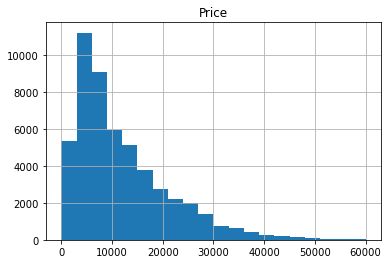

The outliers are considered to be values below 1000.0  and above 34950.0


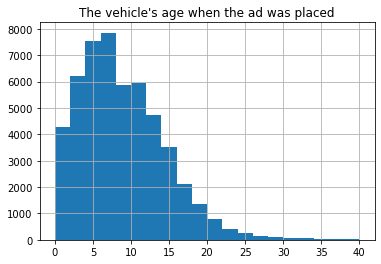

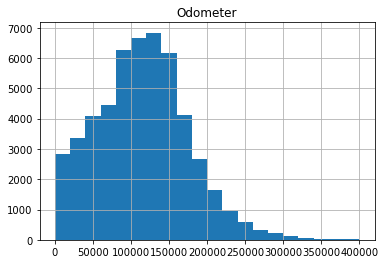

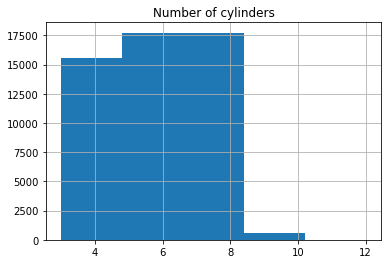

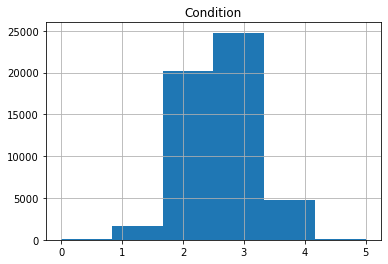

In [45]:
#plots a histogram for the 'price' column with 20 bins and the x-axis ranging from 0 to 60000
plt.title('Price')
data['price'].hist(bins=20, range=(0, 60000))
plt.show() #shows the above histogram
print('The outliers are considered to be values below', np.percentile(data.price, 3), ' and above', np.percentile(data.price, 97))

#plots a histogram for the 'ad_posted_age' column with 20 bins and the x-axis ranging from 0 to 40
plt.title('The vehicle\'s age when the ad was placed')
data['ad_posted_age'].hist(bins=20, range=(0, 40))
plt.show() #shows the above histogram

#plots a histogram for the 'odometer' column with 20 bins and the x-axis ranging from 0 to 400000
plt.title('Odometer')
data['odometer'].hist(bins=20, range=(0, 400000))
plt.show() #shows the above histogram

#plots a histogram for the 'cylinders' column with 5 bins
plt.title('Number of cylinders')
data['cylinders'].hist(bins=5)
plt.show() #shows the above histogram

#plots a histogram for the 'cond_categ' column with 6 bins
plt.title('Condition')
data['cond_categ'].hist(bins=6)
plt.show() #shows the above histogram


Let's analyze what we see on the histograms and what happens to our data.
- on the `price` histogram, the bins begin to zero out and form a wide bottom after 40,000, and the percentile shows us that 97% is 35,000;
- on the `ad_posted_age` histogram, the same thing happens after 30 years;
- on the `odometer` bar graph, we start to notice a tail after 270,000 km.
- there are no outliers on the `cylinder` and `condition` histograms.

## Study and treat outliers

Let's filter our date with these outputs and check - **`price more than 45000, ad_posted_age more than 30, odometer more 270000 km`** and see how the new date compares to the date without outliers.

In [46]:
#creates a slice of data where the price is more than 45000, age is more than 30, and odometer is more than 270000
outlier_data = data.query('price > 45000 & ad_posted_age > 30 & odometer > 270000')
outlier_data.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,ad_posted_age,avg_yearly_mileage,cond_categ
17869,59900,1964.0,chevrolet corvette,like new,8.0,gas,990000.0,automatic,convertible,red,False,2018-06-17,28,17,6,2018,54.0,18333.333333,4


In [47]:
filtered_data = data.query('price < 45000 & ad_posted_age < 30 & odometer < 270000')
filtered_data.info() #general information about dataframe
filtered_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50004 entries, 0 to 51524
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   price               50004 non-null  int64         
 1   model_year          50004 non-null  float64       
 2   model               50004 non-null  object        
 3   condition           50004 non-null  object        
 4   cylinders           50004 non-null  float64       
 5   fuel                50004 non-null  object        
 6   odometer            50004 non-null  float64       
 7   transmission        50004 non-null  object        
 8   type                50004 non-null  object        
 9   paint_color         40990 non-null  object        
 10  is_4wd              50004 non-null  bool          
 11  date_posted         50004 non-null  datetime64[ns]
 12  days_listed         50004 non-null  int64         
 13  ad_day              50004 non-null  int64     

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,ad_posted_age,avg_yearly_mileage,cond_categ
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,23,6,2018,7.0,20714.285714,2
1,25500,2008.0,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,True,2018-10-19,50,19,10,2018,10.0,8870.500000,2
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6.0,18333.333333,4
3,1500,2003.0,ford f-150,fair,8.0,gas,188000.0,automatic,pickup,NaN,False,2019-03-22,9,22,3,2019,16.0,11750.000000,1
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,2.0,40451.500000,3


Now let's build histograms by the same parameters for two tables at the same time - full and filtered tables.

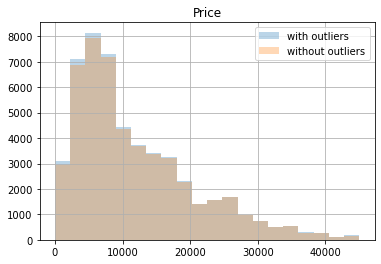

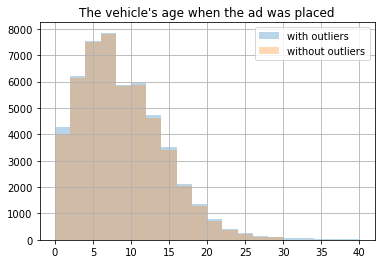

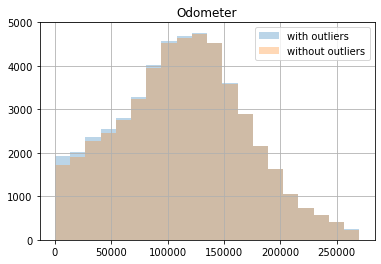

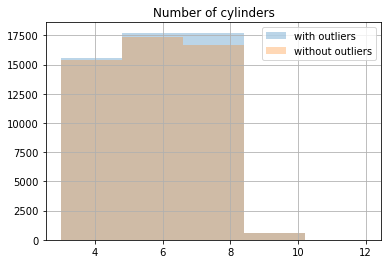

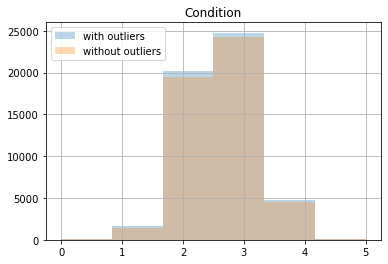

In [48]:
plt.title('Price')
data['price'].hist(bins=20, alpha=0.3, range=(0, 45000), label='with outliers')
filtered_data['price'].hist(bins=20, alpha=0.3, range=(0, 45000), label='without outliers')
plt.legend(loc='upper right')
plt.show() #shows the above histogram

plt.title('The vehicle\'s age when the ad was placed')
data['ad_posted_age'].hist(bins=20, alpha=0.3, range=(0, 40), label='with outliers')
filtered_data['ad_posted_age'].hist(bins=20,alpha=0.3, range=(0, 40), label='without outliers')
plt.legend(loc='upper right')
plt.show()  #shows the above histogram

plt.title('Odometer')
data['odometer'].hist(bins=20, alpha=0.3, range=(0, 270000), label='with outliers')
filtered_data['odometer'].hist(bins=20,alpha=0.3, range=(0, 270000), label='without outliers')
plt.legend(loc='upper right')
plt.show() #shows the above histogram

plt.title('Number of cylinders')
data['cylinders'].hist(bins=5, alpha=0.3, label='with outliers')
filtered_data['cylinders'].hist(bins=5,alpha=0.3, label='without outliers')
plt.legend(loc='upper right')
plt.show() #shows the above histogram

plt.title('Condition')
data['cond_categ'].hist(bins=6, alpha=0.3, label='with outliers')
filtered_data['cond_categ'].hist(bins=6,alpha=0.3, label='without outliers')
plt.legend(loc='upper left')
plt.show() #shows the above histogram

**Conclusions** 
- `Venicle price` - a right skewed histogram, normal correlation with a peak in price of 5000-6000, then a uniform price decrease. Removing the outliers did not affect the histogram and did not change the main distribution.
- `The vehicle's age when the ad was placed` - a right skewed histogram, normal correlation with a peak in 6-7 years, then a uniform decline values. Removing the outliers did not affect the histogram and did not change the main distribution.
- `Odometer` - a central skewed histogram, normal correlation with a peak in 100-150k miles. Removing the outliers did not affect the histogram and did not change the main distribution.
- `Numbers of cylinders` - Removing the outliers did not affect the histogram and did not change the main distribution.
- `Condition` - most of the vehicles shown are in "good" or "excellent" condition. Removing the outliers did not affect the histogram and did not change the main distribution.

<AxesSubplot:xlabel='price'>

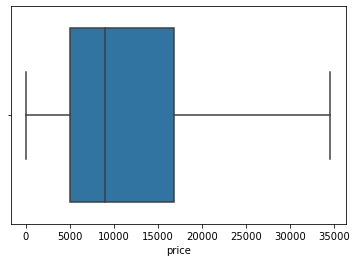

In [49]:
# let's build a boxplot for column 'price' without outliers
sns.boxplot(x=data['price'], showfliers = False)

## Ads lifetime

- Study how many days advertisements were displayed.  
- Calculate the mean and median.  
- Describe the typical lifetime of an ad.  
- Determine when ads were removed quickly, and when they were listed for an abnormally long time.

In [50]:
def distr_percentile(parameter):
    
    ninety_seven = np.percentile(filtered_data[parameter], 97)
    three = np.percentile(filtered_data[parameter], 3)
    print('Statistics on: {}'.format(parameter))
    print('---------------------------------------')
    print('lower outliers border:',three)
    print('max outliers border:',ninety_seven)
    print('---------------------------------------')
    print('The outliers are considered to be values below',three, "and above",ninety_seven)
    print('We have',len(filtered_data[(filtered_data[parameter]<three)|(filtered_data[parameter]>ninety_seven)]),"values that we can consider outliers")

In [51]:
filtered_data['days_listed'].describe()

count    50004.000000
mean        39.541337
std         28.209676
min          0.000000
25%         19.000000
50%         33.000000
75%         53.000000
max        271.000000
Name: days_listed, dtype: float64

Accordingly this information in `days_listed` the mean is about 39 days and the median is 33.

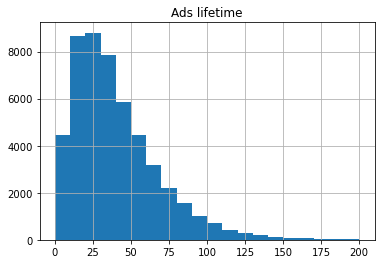

Statistics on: days_listed
---------------------------------------
lower outliers border: 5.0
max outliers border: 105.0
---------------------------------------
The outliers are considered to be values below 5.0 and above 105.0
We have 2760 values that we can consider outliers
None


In [52]:
# plots a histogram for the 'days_listed' column with 20 bins and the x-axis ranging from 0 to 200

plt.title('Ads lifetime')
filtered_data['days_listed'].hist(bins=20, range=(0, 200))
plt.show()
print(distr_percentile('days_listed'))

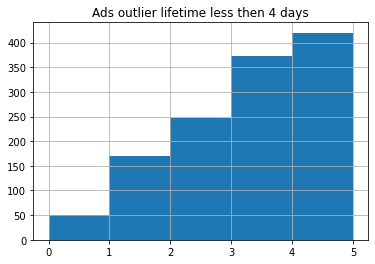

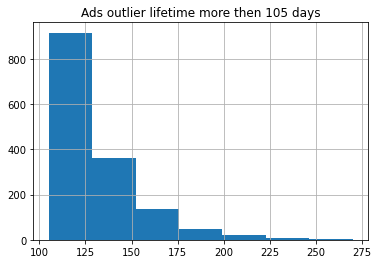

In [53]:
# Determine the lower limits for outliers
ad_outlier_data = filtered_data.query('days_listed < 5')
 
plt.title('Ads outlier lifetime less then 4 days')
ad_outlier_data['days_listed'].hist(bins=5, range=(0, 5)) 
plt.show()

# Determine the upper limits for outliers
ad_outlier_data_max = filtered_data.query('days_listed > 105')
 
plt.title('Ads outlier lifetime more then 105 days')
ad_outlier_data_max['days_listed'].hist(bins=7, range=(105, 270)) 
plt.show()

We will make the assumption that cars in excellent condition and at a lower price are bought faster and therefore they are in the data for a short time. Let's take a look and compare with cars whose ads are more than 105 days old.

In [54]:
print('Type and conditions of the venicles that sold in less then 5 days:')
type_car_short_ad=ad_outlier_data.groupby(['type', 'cond_categ'])['price'].agg(['count','mean']).reset_index().sort_values(by='count',ascending=False)
print(type_car_short_ad.iloc[:3])
print('---------------------------------')
print('')
print('Type and conditions of the venicles that sold in more then 105 days:')
type_car_long_ad=ad_outlier_data_max.groupby(['type', 'cond_categ'])['price'].agg(['count','mean']).reset_index().sort_values(by='count',ascending=False)
print(type_car_long_ad.iloc[:3])

Type and conditions of the venicles that sold in less then 5 days:
     type  cond_categ  count          mean
32    suv           3    159  12066.427673
27  sedan           3    159   7391.440252
37  truck           3    134  16927.507463
---------------------------------

Type and conditions of the venicles that sold in more then 105 days:
     type  cond_categ  count          mean
30    suv           3    201  11211.626866
25  sedan           3    184   8074.701087
34  truck           3    152  18558.967105


Our assumption was not confirmed. There is no pattern and the top three top of ads of these periods are exactly the same.

Let's look at the average value for the columns - `'price', 'model_year', 'odometer', 'cond_categ'`, as well as the average value of the immediate for the data that is included in the lower and upper of the outliers.  
To do this, we define a function that takes our rows as a parameter and calculates the average value in the filtered dataframe.

In [55]:
# function that takes our rows as a parameter and calculates the average value in the filtered dataframe
def lifetime_ads(parameter):
    print(f'Average: {parameter}')
    print('---------------------------------------------------') 
    print(f'for all venicles: {int(filtered_data[parameter].mean())}')
    print(f'for venicles that sold in less then 5 days: {int(ad_outlier_data[parameter].mean())}')
    print(f'for venicles that sold in more then 105 days: {int(ad_outlier_data_max[parameter].mean())}')
    print('---------------------------------------------------')
    print(' ')


In [56]:
# send rows to function lifetime_ads
for parameter in ['price', 'model_year', 'odometer', 'cond_categ']:
    lifetime_ads(parameter)

Average: price
---------------------------------------------------
for all venicles: 11814
for venicles that sold in less then 5 days: 12017
for venicles that sold in more then 105 days: 11599
---------------------------------------------------
 
Average: model_year
---------------------------------------------------
for all venicles: 2010
for venicles that sold in less then 5 days: 2010
for venicles that sold in more then 105 days: 2009
---------------------------------------------------
 
Average: odometer
---------------------------------------------------
for all venicles: 113364
for venicles that sold in less then 5 days: 112949
for venicles that sold in more then 105 days: 115014
---------------------------------------------------
 
Average: cond_categ
---------------------------------------------------
for all venicles: 2
for venicles that sold in less then 5 days: 2
for venicles that sold in more then 105 days: 2
---------------------------------------------------
 


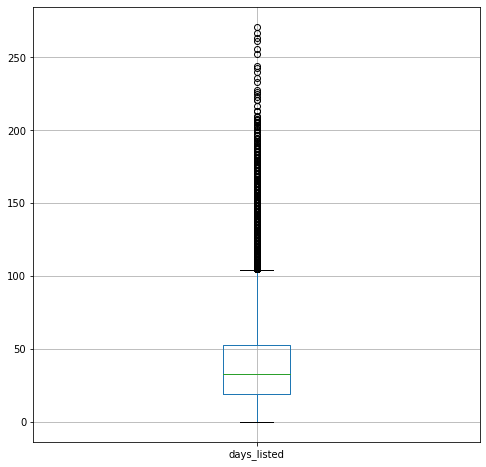

In [57]:
# describe the typical lifetime of an ad, let's make a boxplot
filtered_data.boxplot(column='days_listed', figsize=(8,8))
plt.show()

**Conclusions**
- The typical lifetime of an ad placement is between 19 and 53 days;
- Ads that are in the database for more than 105 days are considered abnormal;
- Ads that were posted less than 19 days consider that the car was sold in a short time.

In [58]:
# gets final filtered data with our conclusions before
filtered_data_fin = filtered_data.query('days_listed > 5 & days_listed < 105')

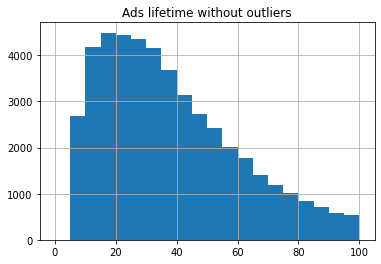

In [59]:
# plots a histogram for the 'days_listed' column without outliers
plt.title('Ads lifetime without outliers')
filtered_data_fin['days_listed'].hist(bins=20, range=(0, 100))
plt.show()

## Average price per each type of vehicle

We analyze the number of ads and the average price for each type of vehicle.  

In [60]:
type_car_ad=filtered_data_fin.groupby(['type'])['price'].agg(['count','mean']).reset_index().sort_values(by='count',ascending=False)
type_car_ad

,type,count,mean
9,suv,11380,10899.724341
8,sedan,11264,6971.959695
10,truck,11055,16150.698236
7,pickup,6267,15904.531674
2,coupe,1956,13758.185072
12,wagon,1385,9179.854874
4,mini-van,1056,8067.854167
3,hatchback,949,6852.707060
11,van,574,10510.503484
1,convertible,358,12774.592179


<AxesSubplot:xlabel='type', ylabel='count'>

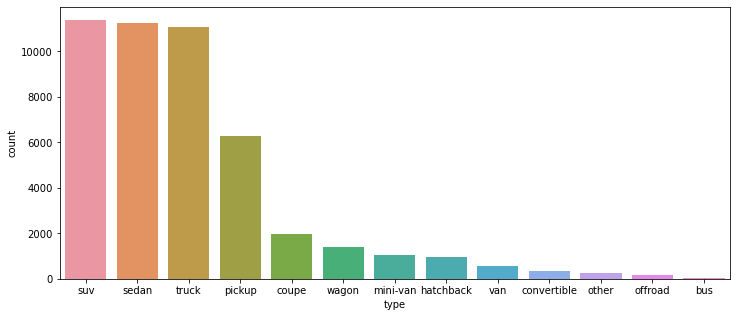

In [61]:
#Plot a graph showing the dependence of the number of ads on the vehicle type
plt.figure(figsize=(12,5))
sns.barplot(x="type", y="count", data=type_car_ad)

Two types with the greatest number of ads - **`suv`** and **`sedan`**.

# Price factors

## Scatterplot for `suv`

Now we will study how the price depends on the age, mileage, condition, type of transmission and color of the car in these categories.  

Let's make a cut according to the type of **`suv`**.

In [62]:
#creates a slice of rows where the type is SUV
suv = filtered_data_fin[filtered_data_fin['type'] == 'suv']
#reset the index after slicing
suv= suv.reset_index(drop=True)
suv

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,ad_posted_age,avg_yearly_mileage,cond_categ
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,suv,NaN,True,2018-06-23,19,23,6,2018,7.0,20714.285714,2
1,15990,2013.0,honda pilot,excellent,6.0,gas,109473.0,automatic,suv,black,True,2019-01-07,68,7,1,2019,6.0,18245.500000,3
2,11500,2012.0,kia sorento,excellent,4.0,gas,104174.0,automatic,suv,NaN,True,2018-07-16,19,16,7,2018,6.0,17362.333333,3
3,9200,2008.0,honda pilot,excellent,6.0,gas,147191.0,automatic,suv,blue,True,2019-02-15,17,15,2,2019,11.0,13381.000000,3
4,12990,2009.0,gmc yukon,excellent,8.0,gas,132285.0,automatic,suv,black,True,2019-01-31,24,31,1,2019,10.0,13228.500000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11375,7999,2010.0,chevrolet traverse,excellent,6.0,gas,109363.0,automatic,suv,NaN,False,2018-12-15,25,15,12,2018,8.0,13670.375000,3
11376,7999,2009.0,chevrolet equinox,excellent,6.0,gas,95021.0,automatic,suv,silver,True,2019-01-03,8,3,1,2019,10.0,9502.100000,3
11377,4999,2002.0,toyota 4runner,excellent,6.0,gas,177901.0,automatic,suv,NaN,True,2018-05-26,59,26,5,2018,16.0,11118.812500,3
11378,6995,2012.0,buick enclave,excellent,6.0,gas,157000.0,automatic,suv,white,True,2018-08-04,17,4,8,2018,6.0,26166.666667,3


In [63]:
# price depends on age, mileage, condition, transmission type, and color.
for_scatter=suv[['price','ad_posted_age','avg_yearly_mileage','cond_categ', 'transmission', 'paint_color']]
for_scatter

,price,ad_posted_age,avg_yearly_mileage,cond_categ,transmission,paint_color
0,9400,7.0,20714.285714,2,automatic,NaN
1,15990,6.0,18245.500000,3,automatic,black
2,11500,6.0,17362.333333,3,automatic,NaN
3,9200,11.0,13381.000000,3,automatic,blue
4,12990,10.0,13228.500000,3,automatic,black
...,...,...,...,...,...,...
11375,7999,8.0,13670.375000,3,automatic,NaN
11376,7999,10.0,9502.100000,3,automatic,silver
11377,4999,16.0,11118.812500,3,automatic,NaN
11378,6995,6.0,26166.666667,3,automatic,white


We use of correlation matrix and correlation plots for study depends.

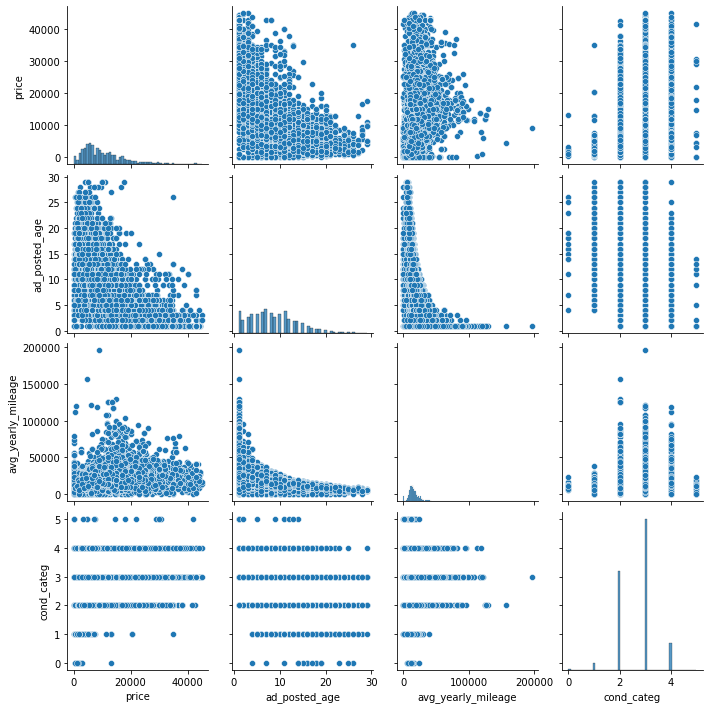

In [64]:
sns.pairplot(for_scatter) 

In [65]:
# correlation matrix
for_scatter.corr()

,price,ad_posted_age,avg_yearly_mileage,cond_categ
price,1.000000,-0.575783,0.261813,0.273052
ad_posted_age,-0.575783,1.000000,-0.549271,-0.340539
avg_yearly_mileage,0.261813,-0.549271,1.000000,0.081089
cond_categ,0.273052,-0.340539,0.081089,1.000000


For categorical variables (transmission type and color), we plot a box-and-whisker charts, and create scatterplots for the rest. When analyzing categorical variables, note that the categories must have at least 50 ads; otherwise, their parameters won't be valid for analysis.

In [66]:
# Making sure that it has more than 50 listings
suv['transmission'].value_counts()

automatic    10774
manual         458
other          148
Name: transmission, dtype: int64

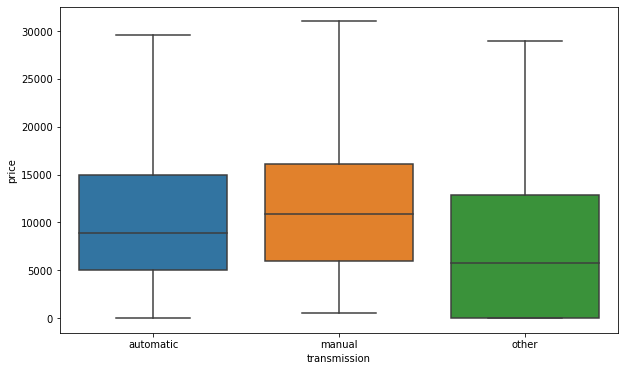

In [67]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="transmission", y="price", data=suv, showfliers = False)

In [68]:
# Making sure that it has more than 50 listings
print(suv['paint_color'].value_counts())

# remove two colors from our data because there are less than 50 
suv_color = suv.query('paint_color not in("yellow", "purple")')

black     2040
white     1793
silver    1447
grey      1101
blue       943
red        841
green      393
brown      334
custom     284
orange      79
yellow      43
purple      36
Name: paint_color, dtype: int64


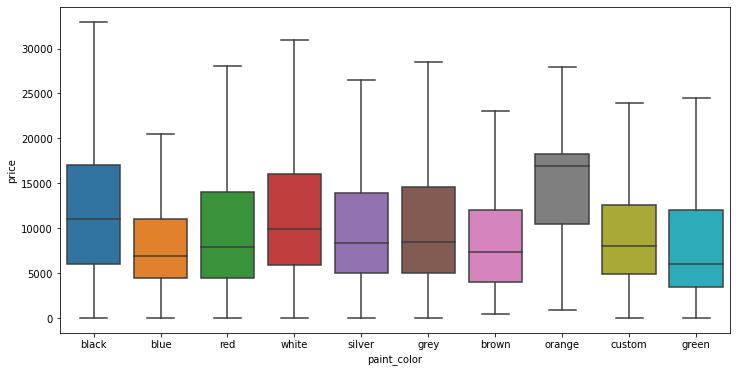

In [69]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="paint_color", y="price", data=suv_color, showfliers = False)

**Conclusions**  

Based on the correlation matrix and histograms, we can say:
- the age of the SUV is a factor that affects the price of the car. No correlation was found between price and condition or average mileage;
- SUVs with manual transmission had higher typical prices than SUV's with automatic transmission;
- the most numerous were advertisements for the sale of cars in black, white and silver.
- the price of black cars was higher than other colors, white cars were in second place. We see that the prices of orange cars are the highest, but due to the small number (only 79) we cannot tell about the trend.

## Scatterplot for `sedan`

Now we will study how the price depends on the age, mileage, condition, type of transmission and color of the car in these categories.

Let's make a cut according to the type of `sedan`.

In [70]:
#creates a slice of rows where the type is SUV
sedan = filtered_data_fin[filtered_data_fin['type'] == 'sedan']
#reset the index after slicing
sedan= sedan.reset_index(drop=True)

sedan

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,ad_day,ad_month,ad_year,ad_posted_age,avg_yearly_mileage,cond_categ
0,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,False,2019-02-07,79,7,2,2019,6.0,18333.333333,4
1,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,False,2019-04-02,28,2,4,2019,2.0,40451.500000,3
2,14990,2014.0,chrysler 300,excellent,6.0,gas,57954.0,automatic,sedan,black,True,2018-06-20,15,20,6,2018,4.0,14488.500000,3
3,12990,2015.0,toyota camry,excellent,4.0,gas,79212.0,automatic,sedan,white,False,2018-12-27,73,27,12,2018,3.0,26404.000000,3
4,8990,2012.0,honda accord,excellent,4.0,gas,111142.0,automatic,sedan,grey,False,2019-03-28,29,28,3,2019,7.0,15877.428571,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11259,9249,2013.0,nissan maxima,like new,6.0,gas,88136.0,automatic,sedan,black,False,2018-10-03,37,3,10,2018,5.0,17627.200000,4
11260,2700,2002.0,honda civic,salvage,4.0,gas,181500.0,automatic,sedan,white,False,2018-11-14,22,14,11,2018,16.0,11343.750000,0
11261,3950,2009.0,hyundai sonata,excellent,4.0,gas,128000.0,automatic,sedan,blue,False,2018-11-15,32,15,11,2018,9.0,14222.222222,3
11262,7455,2013.0,toyota corolla,good,4.0,gas,139573.0,automatic,sedan,black,False,2018-07-02,71,2,7,2018,5.0,27914.600000,2


In [71]:
# price depends on age, mileage, condition, transmission type, and color.
for_scatter_sd=sedan[['price','ad_posted_age','avg_yearly_mileage','cond_categ', 'transmission', 'paint_color']]
for_scatter_sd

,price,ad_posted_age,avg_yearly_mileage,cond_categ,transmission,paint_color
0,5500,6.0,18333.333333,4,automatic,red
1,14900,2.0,40451.500000,3,automatic,black
2,14990,4.0,14488.500000,3,automatic,black
3,12990,3.0,26404.000000,3,automatic,white
4,8990,7.0,15877.428571,3,automatic,grey
...,...,...,...,...,...,...
11259,9249,5.0,17627.200000,4,automatic,black
11260,2700,16.0,11343.750000,0,automatic,white
11261,3950,9.0,14222.222222,3,automatic,blue
11262,7455,5.0,27914.600000,2,automatic,black


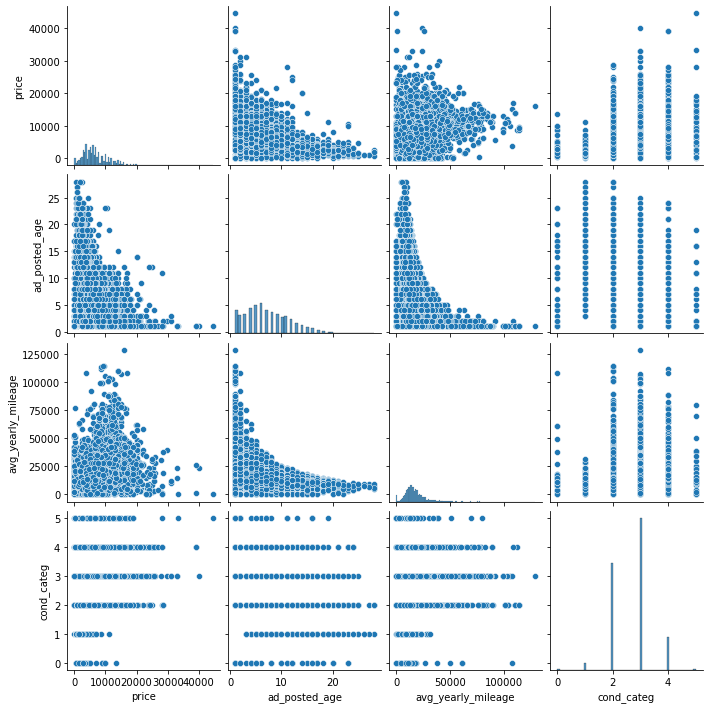

In [72]:
sns.pairplot(for_scatter_sd) 

In [73]:
# correlation matrix
for_scatter_sd.corr()

,price,ad_posted_age,avg_yearly_mileage,cond_categ
price,1.000000,-0.612004,0.265912,0.299017
ad_posted_age,-0.612004,1.000000,-0.525501,-0.318750
avg_yearly_mileage,0.265912,-0.525501,1.000000,0.069336
cond_categ,0.299017,-0.318750,0.069336,1.000000


In [74]:
# Making sure that it has more than 50 listings
sedan['transmission'].value_counts()

automatic    10607
manual         532
other          125
Name: transmission, dtype: int64

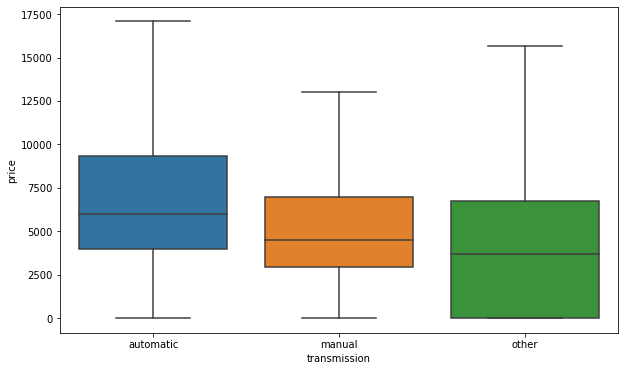

In [75]:
plt.figure(figsize=(10,6))
ax=sns.boxplot(x="transmission", y="price", data=sedan, showfliers = False)

In [76]:
##Making sure that it has more than 50 listings
print(sedan['paint_color'].value_counts())

# remove two colors from our data because there are less than 50 
sedan_color = sedan.query('paint_color not in("yellow", "purple", "orange")')

silver    1880
black     1643
grey      1502
white     1409
blue      1143
red        870
custom     282
brown      245
green      190
yellow      22
purple      20
orange       9
Name: paint_color, dtype: int64


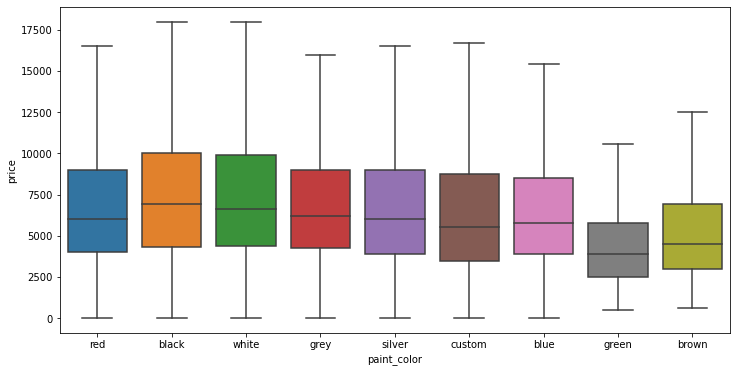

In [77]:
plt.figure(figsize=(12,6))
ax=sns.boxplot(x="paint_color", y="price", data=sedan_color, showfliers = False)

**Conclusions**  

Based on the correlation matrix and histograms, we can say:
- the age of the `sedan` is a factor that affects the price of the car. No correlation was found between price and condition or average mileage;
- Sedan's with automatic transmission had higher typical prices than sedan's with others transmission;
- the most numerous were advertisements for the sale of cars in silver, black, white and grey colors.
- the price of cars in black and white colors was higher than other colors.

# General conclusion

- We filtered the data, replaced the missing values and, based on this, built histograms, graphs, correlation matrices for the study.
- We have added new columns - the age of the car at the time of advertising, the average mileage and made a new classification.
- We have seen that the typical lifetime of advertisements is between 19 and 53 days, and those that last more than 105 days we can consider as anomalously long.
- For short ads, which were only 5 days old, we made an assumption that these were cars in excellent condition for a lower price and they quickly sold out, but this was not confirmed.
- The factor that most influences the price is the age of the car. Pearson correlation coefficient for SUVs - 0.58, for sedans - 0.61.
- The three most popular type featured in ads are SUVs, sedans and trucks - 11380, 11264 and 11055.
- For SUVs, cars in black color and manual transmission cars were more expensive.
- For sedans, black and white cars were almost equally expensive, with silver being the most popular color - 1880. Cars with an automatic transmission were listed as more expensive than a manual transmission.